## AccelerateAI - Time Series Analysis and Forecasting

### ARIMA Models

In [181]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Simulated Data

In [182]:
from statsmodels.tsa.arima_process import ArmaProcess

# simulate time series - AR(1) process
ar1 = np.array([1, 0.8])
sim_data = ArmaProcess(ar=ar1).generate_sample(nsample=1000)

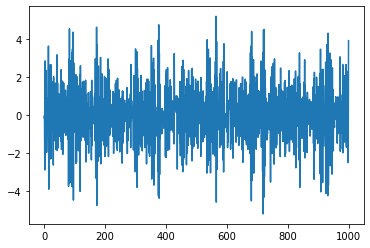

In [183]:
#PLot the series
plt.plot(sim_data)

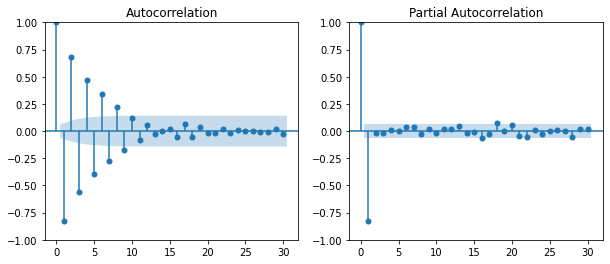

In [184]:
# ACF and PACF plot
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plot_acf(sim_data, ax=ax[0])
plot_pacf(sim_data, method='ywm', ax=ax[1])
plt.show()

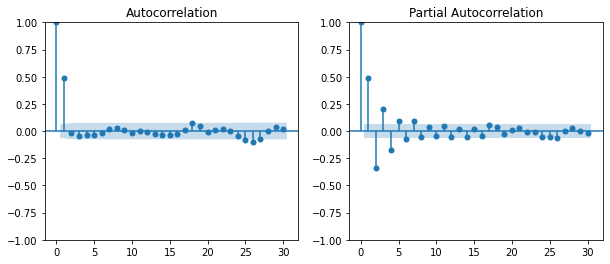

In [185]:
# MA(1) process
ma1 = np.array([1, 0.8])
sim_data = ArmaProcess(ma=ma1).generate_sample(nsample=1000)
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plot_acf(sim_data, ax=ax[0])
plot_pacf(sim_data, method='ywm', ax=ax[1])
plt.show()

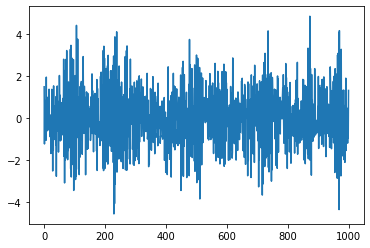

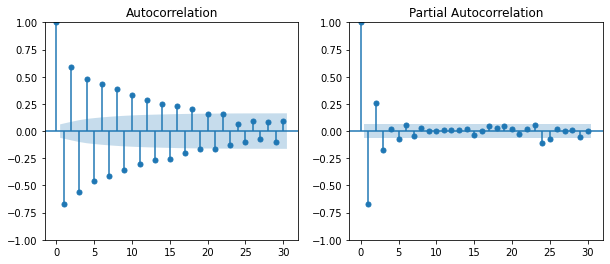

In [186]:
# ARMA(1,1) process
ar2 = np.array([1, 0.9])
ma2 = np.array([1, 0.5])
sim_data = ArmaProcess(ar=ar2, ma=ma2).generate_sample(nsample=1000)

#Plot the series
plt.plot(sim_data)

#Plots the correllogram 
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plot_acf(sim_data, ax=ax[0])
plot_pacf(sim_data, method='ywm', ax=ax[1])
plt.show()

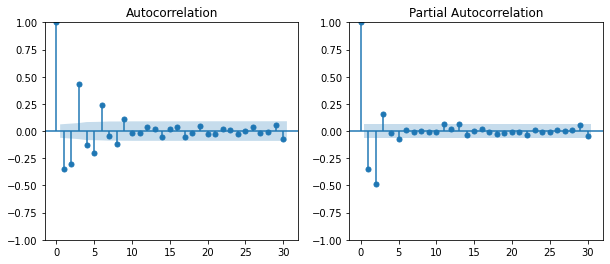

In [188]:
# ARMA(3,2) process
ar3 = np.array([1, 0.9, 0.8, 0.1])
ma3 = np.array([1, 0.5, 0.2])
sim_data = ArmaProcess(ar=ar3, ma=ma3).generate_sample(nsample=1000)
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plot_acf(sim_data, ax=ax[0])
plot_pacf(sim_data, method='ywm', ax=ax[1])
plt.show()

### Website Traffic Data Analysis

In [189]:
# Read the daily website visits data
visits=pd.read_csv('website-visits.csv')

In [190]:
# Data Cleaning
visits=visits.replace(',','',regex=True)
visits['PageLoads']=visits['PageLoads'].astype(int)
visits['UniqueVisits']=visits['UniqueVisits'].astype(int)
visits['FirstTimeVisits']=visits['FirstTimeVisits'].astype(int)
visits['ReturningVisits']=visits['ReturningVisits'].astype(int)

#Convert to datetime
visits['Date']= pd.to_datetime(visits['Date'])

#Check
visits.head()

,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


<AxesSubplot:>

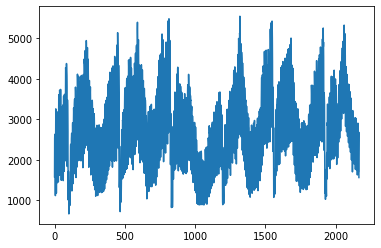

In [196]:
visits['UniqueVisits'].plot()

In [191]:
# Stationarity check 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(visits['UniqueVisits'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','# Observations'])
print(dfoutput)

Test Statistic      -4.475969
p-value              0.000217
#lags used          26.000000
# Observations    2140.000000
dtype: float64


Conclusion: 
- H0: β = 0 (equivalent to φ = 1) =>  the time series has a unit root, meaning it is non-stationary 
- **p-value < 0.05**; We reject the H0. The data is stationary.

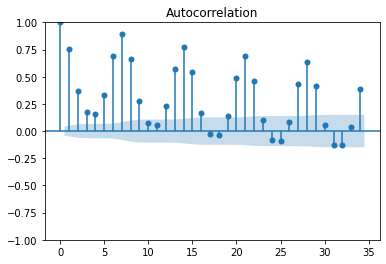

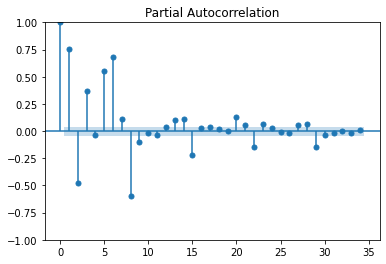

In [192]:
#ACF and PACF plots to identify model order
acf_res = plot_acf(visits['UniqueVisits'])
pacf_res = plot_pacf(visits['UniqueVisits'], method='ywm')

### ARIMA using StatsModels 

In [193]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
series = visits['UniqueVisits']
model = ARIMA(series, order=(7,0,0))
ar_model = model.fit()

# summary of fit model
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:           UniqueVisits   No. Observations:                 2167
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -15509.758
Date:                Sat, 05 Nov 2022   AIC                          31037.516
Time:                        18:24:41   BIC                          31088.646
Sample:                             0   HQIC                         31056.214
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2943.6465    236.727     12.435      0.000    2479.669    3407.624
ar.L1          0.8880      0.017     51.386      0.000       0.854       0.922
ar.L2         -0.6077      0.024    -25.493      0.0

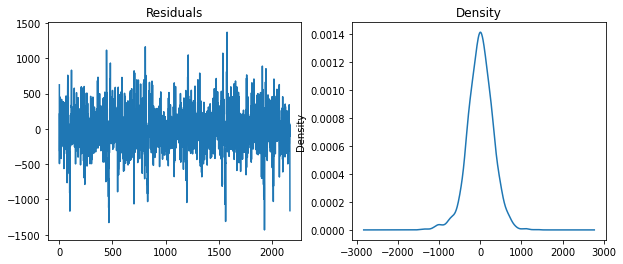

In [194]:
import matplotlib.pyplot as plt
residuals = ar_model.resid[1:]
fig, ax = plt.subplots(1,2, figsize=(10, 4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

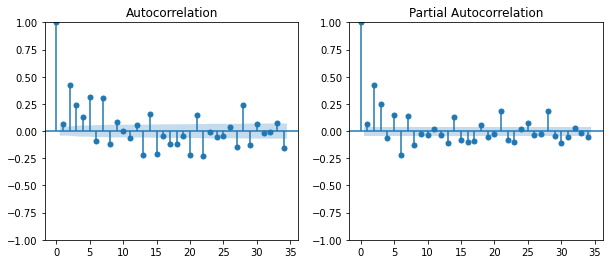

In [197]:
#ACF and PACF or residuals
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, method='ywm', ax=ax[1])
plt.show()

In [198]:
# Add MA terms 
model = ARIMA(series, order=(7,0,1))
arma_model = model.fit()
# summary of fit model
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:           UniqueVisits   No. Observations:                 2167
Model:                 ARIMA(7, 0, 1)   Log Likelihood              -15365.478
Date:                Sat, 05 Nov 2022   AIC                          30750.955
Time:                        18:30:07   BIC                          30807.766
Sample:                             0   HQIC                         30771.731
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2943.6147    375.814      7.833      0.000    2207.032    3680.197
ar.L1          0.2094      0.029      7.245      0.000       0.153       0.266
ar.L2         -0.0103      0.029     -0.352      0.7

C:\Users\sachi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


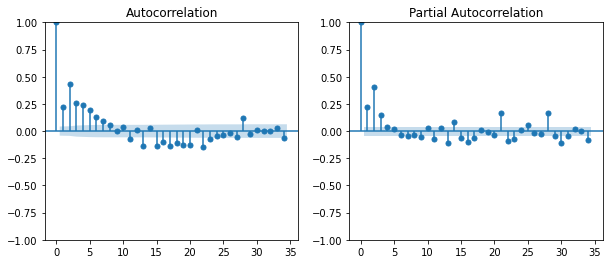

In [199]:
residuals = arma_model.resid[1:]
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, method='ywm', ax=ax[1])
plt.show()

### ARIMA using Sktime

In [200]:
from sktime.forecasting.arima import ARIMA as sktARIMA

In [201]:
# fit model
series = visits['UniqueVisits']
skt_model = sktARIMA(order=(7,0,1), suppress_warnings=True)
skt_model.fit(series)

# summary of fit model
print(skt_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2167
Model:               SARIMAX(7, 0, 1)   Log Likelihood              -15366.200
Date:                Sat, 05 Nov 2022   AIC                          30752.400
Time:                        18:34:05   BIC                          30809.211
Sample:                             0   HQIC                         30773.175
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     85.7399     41.709      2.056      0.040       3.993     167.487
ar.L1          0.2125      0.029      7.308      0.000       0.156       0.270
ar.L2         -0.0132      0.030     -0.443      0.6

### AutoARIMA using PDMARIMA 

In [ ]:
from pmdarima.arima import auto_arima

In [202]:
series = visits['UniqueVisits']

aa_model = auto_arima(series, start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=2,
                      m=1,                   #non-seasonal
                      d=0,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=33682.261, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40995.839, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=34391.210, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=38230.380, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=33672.418, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=34159.823, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=33471.179, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=33469.926, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=33464.607, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=33426.835, Time=0.43 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=31903.481, Time=1.23 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=31062.738, Time=1.32 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(7,0,1)(0,0,0)[0]        

In [203]:
aa_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2167
Model:               SARIMAX(7, 0, 2)   Log Likelihood              -15182.796
Date:                Sat, 05 Nov 2022   AIC                          30387.592
Time:                        18:39:41   BIC                          30450.084
Sample:                             0   HQIC                         30410.445
                               - 2167                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     85.4699     64.466      1.326      0.185     -40.881     211.821
ar.L1          0.5780      0.033     17.381      0.000       0.513       0.643
ar.L2         -0.5793      0.037    -15.784      0.000      -0.651      -0.507
ar.L3          0.4797      0.039     12.240      0.000       0.403       0.557
ar.L4         -0.2459      0.042     -5.815      0.000      -0.329      -0.163
ar.L5         -0.0018      0.041     -0.046      0.964      -0.081       0.078
ar.L6          0.2430      0.036      6.701      0.000       0.172       0.314
ar.L7          0.4951      0.034     14.736      0.000       0.429       0.561
ma.L1          0.3839      0.027     14.161      0.000       0.331       0.437
ma.L2          0.7254      0.020     36.260      0.000       0.686       0.765
sigma2      9.621e+04   3299.322     29.160      0.000    8.97e+04    1.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):               321.74
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.19
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
# Check with Statsmodels 
model = ARIMA(series, order=(7,1,2))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           UniqueVisits   No. Observations:                 2167
Model:                 ARIMA(7, 1, 2)   Log Likelihood              -14995.816
Date:                Sat, 05 Nov 2022   AIC                          30011.632
Time:                        18:41:12   BIC                          30068.439
Sample:                             0   HQIC                         30032.406
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0247      0.023      1.081      0.280      -0.020       0.069
ar.L2         -0.2803      0.024    -11.525      0.000      -0.328      -0.233
ar.L3         -0.0998      0.020     -5.090      0.0

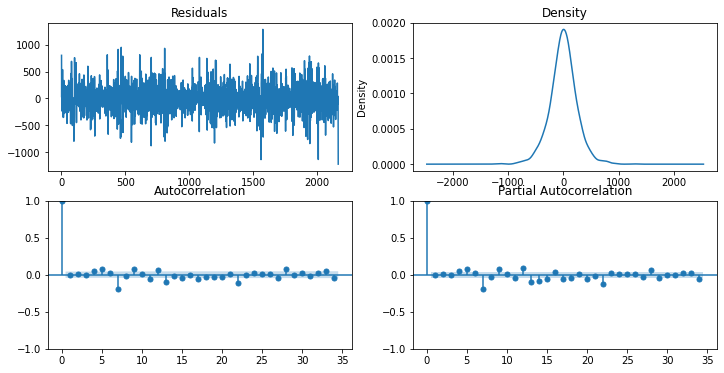

In [205]:
# Residual Plots 
residuals = model_fit.resid[1:]

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
residuals.plot(title='Residuals', ax=ax[0][0])
residuals.plot(title='Density', kind='kde', ax=ax[0][1])
plot_acf(residuals, ax=ax[1][0])
plot_pacf(residuals, method='ywm', ax=ax[1][1])
plt.show()

In [207]:
# ARIMA with specific orders 
model = ARIMA(series, order=((2,3,4,5,7), 1, 0))
final_model = model.fit()

# summary of fit model
print(final_model.summary())

                                    SARIMAX Results                                     
Dep. Variable:                     UniqueVisits   No. Observations:                 2167
Model:             ARIMA([2, 3, 4, 5, 7], 1, 0)   Log Likelihood              -15003.599
Date:                          Sat, 05 Nov 2022   AIC                          30019.198
Time:                                  18:45:10   BIC                          30053.281
Sample:                                       0   HQIC                         30031.662
                                         - 2167                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.2712      0.013    -21.560      0.000      -0.296      -0.247
ar.L3         -0.1202      0.011    -11.000      0.

In [ ]:
# Residual Plots 
residuals = final_model.resid[1:]

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
residuals.plot(title='Residuals', ax=ax[0][0])
residuals.plot(title='Density', kind='kde', ax=ax[0][1])
plot_acf(residuals, ax=ax[1][0])
plot_pacf(residuals, method='ywm', ax=ax[1][1])
plt.show()

In [210]:
final_model.predict(start=2168, end=2200)

2168    1344.296436
2169     962.260229
2170    1369.390780
2171    2147.345633
2172    2147.582083
2173    1289.805088
2174    1197.377269
2175    1120.945332
2176     821.550915
2177    1224.976466
2178    2020.055107
2179    1980.234526
2180    1247.050315
2181    1122.397198
2182    1068.102727
2183     814.911328
2184    1206.325730
2185    1970.621014
2186    1908.597500
2187    1250.236316
2188    1105.706968
2189    1054.730380
2190     837.164645
2191    1217.634149
2192    1937.213463
2193    1864.592481
2194    1260.081440
2195    1104.285487
2196    1050.986012
2197     864.503631
2198    1235.262387
2199    1907.388825
2200    1830.219845
Name: predicted_mean, dtype: float64

In [209]:
visits.shape

(2167, 8)

***